In [8]:
import sklearn
from sklearn.datasets import load_wine
import torch

In [2]:
data = load_wine()

In [4]:
# divide data into features and labels
X = data.data
y = data.target

# split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [6]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

In [15]:
# create dataloaders
trainloader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=True)

In [10]:
model = torch.nn.Sequential()
model.add_module("linear_1", torch.nn.Linear(13, 13))
model.add_module("relu_1", torch.nn.ReLU())
model.add_module("linear_2", torch.nn.Linear(13, 3))
model.add_module("softmax_1", torch.nn.Softmax())


In [12]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)
num_epochs = 1000

In [ ]:
# def train(model, num_epochs, train_dl, valid_dl, loss_fn, optimizer):
#     loss_hist_train = [0] * num_epochs
#     accuracy_hist_train = [0] * num_epochs
#     loss_hist_valid = [0] * num_epochs
#     accuracy_hist_valid = [0] * num_epochs
#     for epoch in range(num_epochs):
#         model.train()
#         for x_batch, y_batch in train_dl:
#             pred = model(x_batch)[:, 0]
#             loss = loss_fn(pred, y_batch.float())
#             loss.backward()
#             optimizer.step()
#             optimizer.zero_grad()
#             loss_hist_train[epoch] += loss.item()*y_batch.size(0)
#             is_correct = ((pred>=0.5).float() == y_batch).float()
#             accuracy_hist_train[epoch] += is_correct.sum().cpu()

#         loss_hist_train[epoch] /= len(train_dl.dataset)
#         accuracy_hist_train[epoch] /= len(train_dl.dataset)
        
#         model.eval()
#         with torch.no_grad():
#             for x_batch, y_batch in valid_dl:
#                 pred = model(x_batch)[:, 0]
#                 loss = loss_fn(pred, y_batch.float())
#                 loss_hist_valid[epoch] += loss.item()*y_batch.size(0) 
#                 is_correct = ((pred>=0.5).float() == y_batch).float()
#                 accuracy_hist_valid[epoch] += is_correct.sum().cpu()

#         loss_hist_valid[epoch] /= len(valid_dl.dataset)
#         accuracy_hist_valid[epoch] /= len(valid_dl.dataset)
        
#         print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
#     return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid


In [22]:
import torch

def train_multiclass(model, num_epochs, train_dl, valid_dl, loss_fn, optimizer):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            pred = model(x_batch.float())
            loss = loss_fn(pred, y_batch.long())
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item() * y_batch.size(0)
            is_correct = (pred.argmax(dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                pred = model(x_batch.float())
                loss = loss_fn(pred, y_batch.long())
                loss_hist_valid[epoch] += loss.item() * y_batch.size(0)
                is_correct = (pred.argmax(dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid


In [23]:
train_loss, valid_loss, train_acc, valid_acc = train_multiclass(model, num_epochs, trainloader, testloader, loss, optimizer)

c:\Users\Vladyslav\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\modules\container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 1 accuracy: 0.5645 val_accuracy: 0.5185
Epoch 2 accuracy: 0.5806 val_accuracy: 0.5370
Epoch 3 accuracy: 0.5887 val_accuracy: 0.5185
Epoch 4 accuracy: 0.5887 val_accuracy: 0.5370
Epoch 5 accuracy: 0.5968 val_accuracy: 0.5556
Epoch 6 accuracy: 0.6048 val_accuracy: 0.5741
Epoch 7 accuracy: 0.6048 val_accuracy: 0.5741
Epoch 8 accuracy: 0.6129 val_accuracy: 0.5741
Epoch 9 accuracy: 0.6210 val_accuracy: 0.5741
Epoch 10 accuracy: 0.6290 val_accuracy: 0.5741
Epoch 11 accuracy: 0.6290 val_accuracy: 0.5926
Epoch 12 accuracy: 0.6290 val_accuracy: 0.6111
Epoch 13 accuracy: 0.6371 val_accuracy: 0.6111
Epoch 14 accuracy: 0.6452 val_accuracy: 0.6111
Epoch 15 accuracy: 0.6532 val_accuracy: 0.6111
Epoch 16 accuracy: 0.6532 val_accuracy: 0.6111
Epoch 17 accuracy: 0.6532 val_accuracy: 0.6111
Epoch 18 accuracy: 0.6452 val_accuracy: 0.6111
Epoch 19 accuracy: 0.6694 val_accuracy: 0.6111
Epoch 20 accuracy: 0.6774 val_accuracy: 0.6296
Epoch 21 accuracy: 0.6855 val_accuracy: 0.6296
Epoch 22 accuracy: 0.6

In [24]:
import matplotlib.pyplot as plt

def plot_loss(train_loss, valid_loss, num_epochs):
    epochs = range(1, num_epochs + 1)
    
    plt.plot(epochs, train_loss, label='Training Loss', marker='o')
    plt.plot(epochs, valid_loss, label='Validation Loss', marker='o')
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.grid()
    
    plt.show()

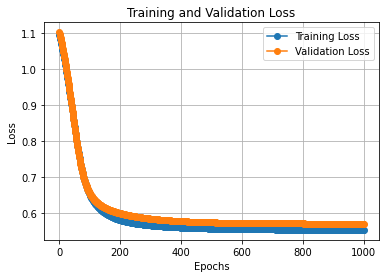

In [25]:
plot_loss(train_loss, valid_loss, num_epochs)